# Convolution Neural Network

1. Train
2. Evaluate
3. Visualize Accuracy & Lost
4. Re-evaluate Model
5. Make Predictions on the Test Set
6. Visualize classification report


In [1]:
## Import Libraries
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pathlib
import pandas as pd
from PIL import Image 
from PIL.ImageDraw import Draw
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [2]:
# Define Classes
classes = ['Transformer','No-Transformer']

In [4]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory("Images/PyTorch2/TRAIN/",
                                          target_size=(52,52),
                                          batch_size = 32,
                                          class_mode = 'binary')
                                         
test_dataset = test.flow_from_directory("Images/PyTorch2/TEST/",
                                          target_size=(52,52),
                                          batch_size =32,
                                          class_mode = 'binary')

Found 300 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


In [5]:
test_dataset.class_indices


{'No-Transformer': 0, 'Transformer': 1}

In [6]:
model = keras.Sequential()

# Convolutional layer and maxpool layer 1
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(52,52,3)))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 2
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 3
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 4
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# This layer flattens the resulting image array to 1D array
model.add(keras.layers.Flatten())

# Hidden layer with 512 neurons and Rectified Linear Unit activation function 
model.add(keras.layers.Dense(512,activation='relu'))

# Output layer with single neuron which gives 0 for Cat or 1 for Dog 
#Here we use sigmoid activation function which makes our model output to lie between 0 and 1
model.add(keras.layers.Dense(1,activation='sigmoid'))

2021-12-15 16:57:43.494609: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [33]:
#model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy', Precision(), Recall()])


In [34]:
#steps_per_epoch = train_imagesize/batch_size
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
training_epochs = 5

history = model.fit(train_dataset,
            validation_data=(train_dataset),
             batch_size=32,
             epochs=training_epochs,
             shuffle=True,
             verbose=1)

Epoch 1/5
10/10 [==============================] - 2s 99ms/step - loss: 0.7126 - accuracy: 0.6400 - val_loss: 0.5775 - val_accuracy: 0.7033
Epoch 2/5
10/10 [==============================] - 1s 76ms/step - loss: 0.6025 - accuracy: 0.7067 - val_loss: 0.5666 - val_accuracy: 0.7067
Epoch 3/5
10/10 [==============================] - 1s 77ms/step - loss: 0.5327 - accuracy: 0.7100 - val_loss: 0.4754 - val_accuracy: 0.7867
Epoch 4/5
10/10 [==============================] - 1s 78ms/step - loss: 0.4240 - accuracy: 0.8300 - val_loss: 0.3770 - val_accuracy: 0.8333
Epoch 5/5
10/10 [==============================] - 1s 80ms/step - loss: 0.3677 - accuracy: 0.8367 - val_loss: 0.3430 - val_accuracy: 0.8533


In [36]:
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(52,52))
    
    plt.imshow(img1)
 
    Y = image.img_to_array(img1)
    
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        
        plt.xlabel("Transformer",fontsize=30)
        
    
    elif val == 0:
        
        plt.xlabel("No-Transformer",fontsize=30)
        

[[1.]]


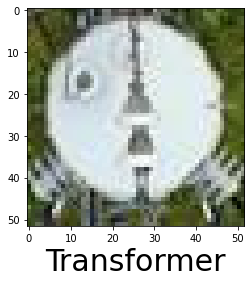

In [37]:
predictImage(r'/Users/kimsourthach/Desktop/Object_Detection/Images/PyTorch2/TEST/Transformer/28.jpg')


[[1.]]


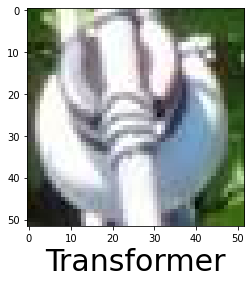

In [38]:
predictImage(r'/Users/kimsourthach/Desktop/Object_Detection/Images/PyTorch2/TEST/No-Transformer/1_T10.jpg')

In [39]:
score = model.fit(test_dataset,batch_size=4)

3/3 [==============================] - 0s 49ms/step - loss: 0.6719 - accuracy: 0.7125


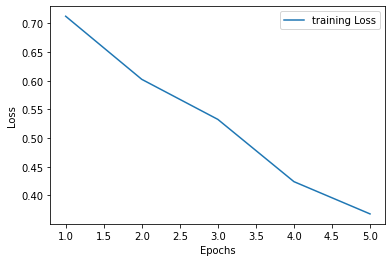

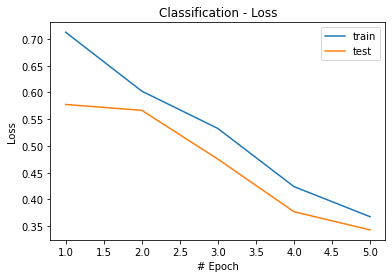

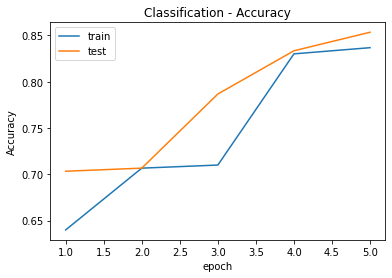

In [40]:
loss_values = history.history['loss']
epochs = range(1, len(loss_values)+1)

plt.plot(epochs, history.history['loss'], label='training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.figure()
plt.plot(epochs,history.history['loss'], label='train')
plt.plot(epochs,history.history['val_loss'], label='test')
plt.title('Classification - Loss')
plt.ylabel('Loss')
plt.xlabel('# Epoch')
plt.legend()

plt.figure()
plt.plot(epochs,history.history['accuracy'], label='train')
plt.plot(epochs,history.history['val_accuracy'], label='test')
plt.title('Classification - Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend()



In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)        0

In [42]:
predictions = model.predict(test_dataset,batch_size=32)

In [47]:
print(history.history)

{'loss': [0.7126102447509766, 0.6025388240814209, 0.5326522588729858, 0.42402154207229614, 0.3677385747432709], 'accuracy': [0.6399999856948853, 0.7066666483879089, 0.7099999785423279, 0.8299999833106995, 0.8366666436195374], 'val_loss': [0.5775223970413208, 0.5666155219078064, 0.4753856956958771, 0.3770337402820587, 0.34300854802131653], 'val_accuracy': [0.70333331823349, 0.7066666483879089, 0.7866666913032532, 0.8333333134651184, 0.8533333539962769]}


In [28]:
matrix = metrics.confusion_matrix(test_dataset.argmax(axis=1), predictions.argmax(axis=1))


NameError: name 'metrics' is not defined

In [43]:
import sklearn
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(test_dataset,predictions))
print("Precision:",metrics.precision_score(test_dataset,predictions))
print("Recall:",metrics.recall_score(test_dataset,predictions))

from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(test_dataset, predictions)
cnf_matrix




ValueError: Found input variables with inconsistent numbers of samples: [3, 80]

In [44]:
import seaborn as sns
class_names=['Transformer','No Transformer']
fig, ax = plt.subplots()

sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap="icefire",fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

ModuleNotFoundError: No module named 'seaborn'

In [45]:
from keras.metrics import Precision, Recall

model.compile(loss='binary_crossentropy', metrics=['accuracy', Precision(), Recall()])

print(Precision)
print(Recall)

<class 'keras.metrics.Precision'>
<class 'keras.metrics.Recall'>


In [46]:
m =  tf.keras.metrics.Precision()

print(m)

Precision(name=precision_4,dtype=float32,thresholds=None,top_k=None,class_id=None)
